In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS 
from nltk.probability import FreqDist
from nltk.corpus import brown
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.decomposition import PCA
import nltk
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
import re
from keras.layers import *
from sklearn.metrics import roc_auc_score
from keras.preprocessing.sequence import pad_sequences
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('nps_chat')
nltk.download('punkt')
nltk.download('wordnet')
#nltk.download('names')
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from tqdm import tqdm
import matplotlib.style as style
style.use('fivethirtyeight')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import keras
from keras.preprocessing.text import one_hot
from keras import * 
from sklearn import metrics

/Users/bassim/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/Users/bassim/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bassim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bassim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /Users/bassim/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bassim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /Users/bassim/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package nps_chat to /Users/bassim/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package punkt to /Users/bassim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading pack

In [2]:
data = pd.read_csv('data_all.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
# Helper functions NLP

def tokenize(sentences):
    tokenized_sent = []
    tokenizer = RegexpTokenizer(r'\w+')
    for sentence in sentences:
        tokenized_sent.append(tokenizer.tokenize(sentence))
    return tokenized_sent

def rem_stop_words(sentences):
    cleaned_sents = []
    for sentence in sentences:
        cleaned_words = []
        for word in sentence:
            if word not in stop_words:
                cleaned_words.append(word)
        cleaned_sents.append(cleaned_words)
    return cleaned_sents

def lem(sentences):
    cleaned_sents = []
    lemmatizer=WordNetLemmatizer()
    for sentence in sentences:
        cleaned_words = []
        for word in sentence:
            cleaned_words.append(lemmatizer.lemmatize(word))
        cleaned_sents.append(cleaned_words)
    return cleaned_sents

def eng_sents(sentences):
    words = set(nltk.corpus.words.words())
    cleaned_sents = []
    for sentence in sentences:
        count_eng = 0
        count_non_eng = 0
        for word in sentence:
            if word not in words:
                count_non_eng +=1
            else:
                count_eng +=1
        if count_eng > count_non_eng:
            cleaned_sents.append(sentence)
    return cleaned_sents

def preprocess (sentences):
    return lem(rem_stop_words(eng_sents(tokenize(sentences))))

def pos_tag(sentences):
    pos_tagged_sents = []
    for sentence in work_sent:
        pos_tagged_sents.append(nltk.pos_tag(sentence))
    return pos_tagged_sents

In [4]:
sentences_processed = preprocess([str(x).lower() for x in list(data['title'])])

In [5]:
final = []
for sentence in sentences_processed:
    test = []
    for word in sentence:
        if word !='xe2x80x94':
            test.append(word)
    final.append(test)

In [6]:
sentences_processed = final

In [7]:
len(sentences_processed)

526

In [11]:
new_headlines = pd.read_csv('abcnews-date-text.csv')

In [12]:
data_additional = new_headlines.tail(600)
data_additional.columns = ['publish_date','title']

In [13]:
data_additional.drop('publish_date',axis=1,inplace=True)

/Users/bassim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
headlines_preprocessed = preprocess([str(x).lower() for x in list(data_additional['title'])])

In [45]:
headlines_preprocessed = [x for x in headlines_preprocessed if 'australia' not in x]
headlines_preprocessed = [x for x in headlines_preprocessed if 'melbourne' not in x]

In [49]:
target = [1]*526 + [0]*456
train = sentences_processed + headlines_preprocessed

In [36]:
model = Word2Vec(train, min_count=1)
words = list(model.wv.vocab)
print(len(words))

2881


In [37]:
print(model)

Word2Vec(vocab=2881, size=100, alpha=0.025)


In [18]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/Users/bassim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


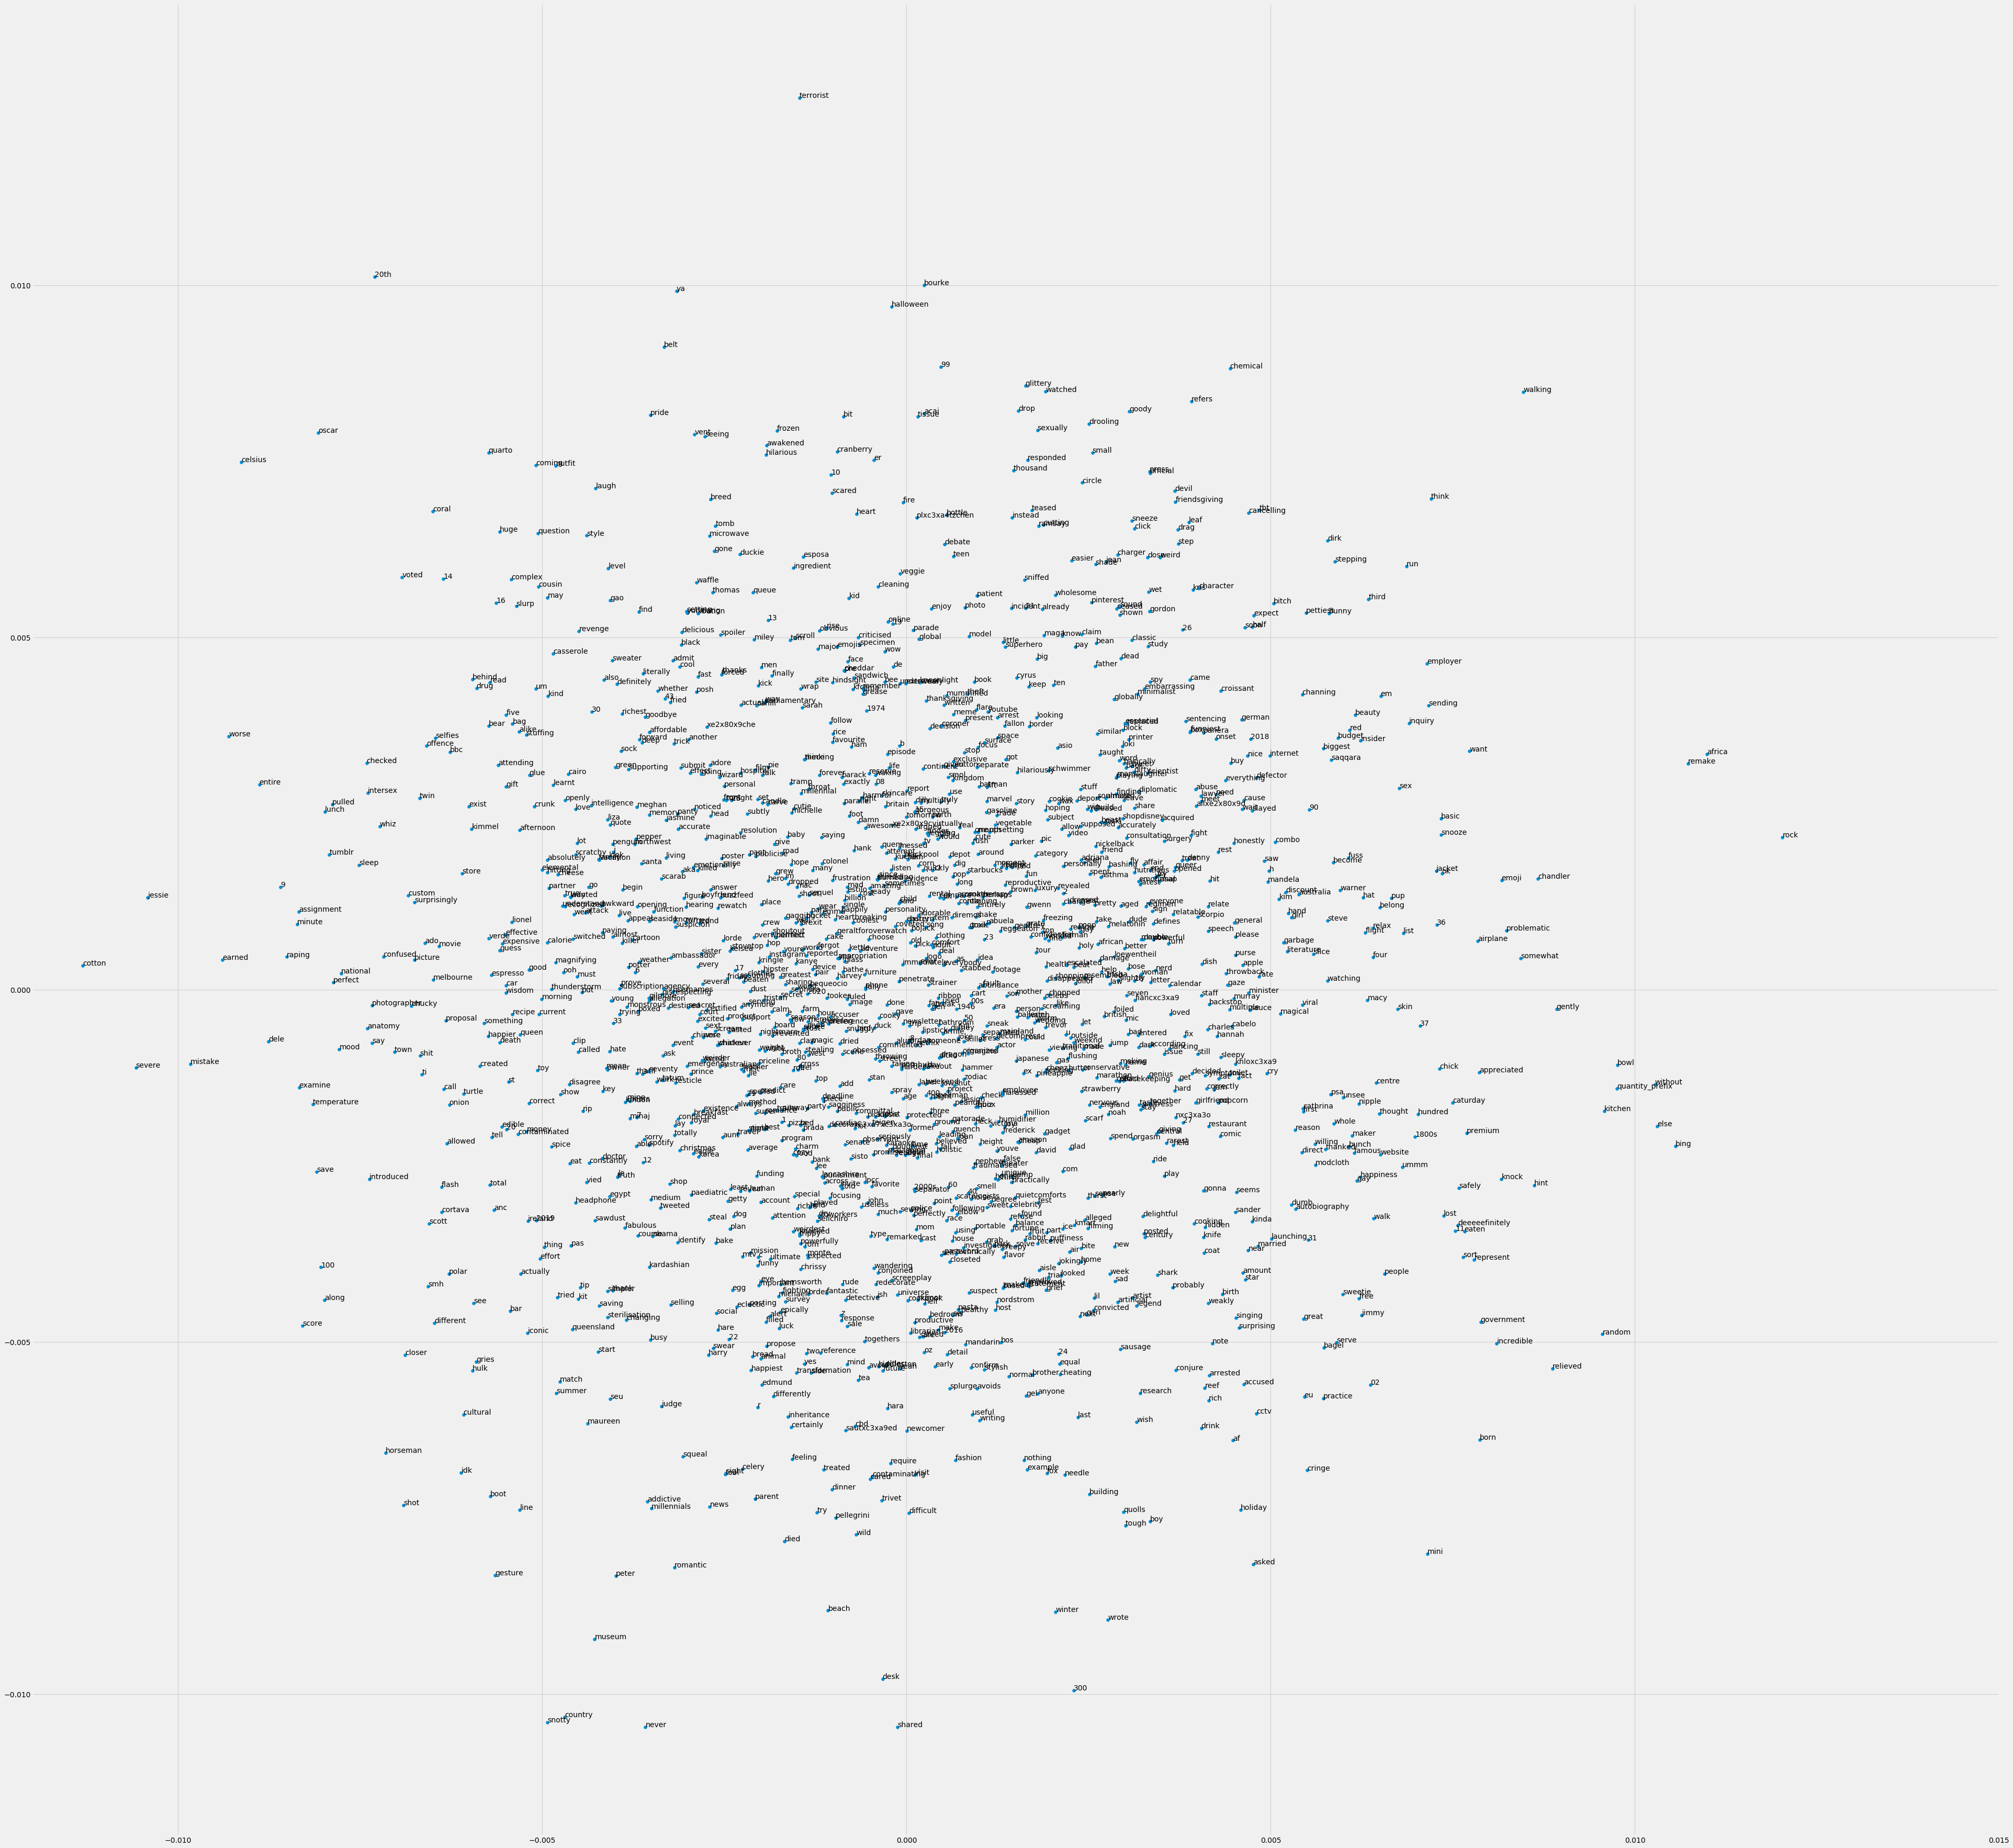

In [90]:
plt.figure(figsize=(60,60))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.ylim(ymin=-0.012,ymax=0.014)
plt.xlim(xmin=-0.012,xmax=0.015)
plt.show()

In [50]:
data = pd.DataFrame()
data['title'] = train
data['target'] = target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data['title'], data['target'], test_size=0.10, random_state=42)

In [52]:
# Transform each text into a vector of word counts
vectorizer = CountVectorizer(stop_words="english")

training_features = vectorizer.fit_transform([' '.join(x) for x in X_train])    
test_features = vectorizer.transform([' '.join(x) for x in X_test])

model = LinearSVC()
model.fit(training_features, y_train)
y_pred = model.predict(test_features)

# Evaluation
acc = accuracy_score(y_test, y_pred)

print("Accuracy on the headline dataset: {:.2f}".format(acc*100))

Accuracy on the headline dataset: 83.84


In [59]:
generated = pd.read_csv('generated_titles.csv')

In [60]:
generated.head()

,Unnamed: 0,titles
0,0,"['25', 'pencils', 'which', 'will', 'definitely..."
1,1,"['21', 'american federation of labors', 'that'..."
2,2,"['21', 'unionidaes', 'which', 'will', 'definit..."
3,3,"['16', 'teamsters', 'that', 'will', 'definitel..."
4,4,"['17', 'ectoprocts', 'that', 'will', 'definite..."


In [69]:
# testing on our made up titles

generated_titles = generated['titles']
generated_titles = vectorizer.transform([' '.join(x) for x in generated_titles])
new_pred = model.predict(generated_titles)
acc = accuracy_score([1]*1000, new_pred)

print("Accuracy on the generated buzzfeed titles: {:.2f}".format(acc*100))

Accuracy on the generated buzzfeed titles: 100.00


/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


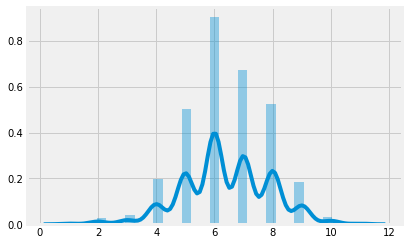

In [56]:
sns.distplot([len(x) for x in headlines_preprocessed])

In [20]:
test = pd.DataFrame()
test['headlines'] = X_test
test['true'] = y_test
test['pred'] = y_pred

In [21]:
test[test['true']!=test['pred']]

,headlines,true,pred
655,"[adopt, pensioner, program, teach, joy, giving]",0,1
962,"[young, worker, likely, use, phone, driving]",0,1
281,"[leading, coral, reef, research, centre, turne...",1,0
717,"[typhoon, tembin, weakens, head, southern, vie...",0,1
953,"[good, news, story, might, missed, year]",0,1
921,"[citizen, science, project, summer]",0,1
621,"[card, designer, wayne, robinson, journey, hom...",0,1
558,"[u, warns, un, remember, day]",0,1
877,"[liberia, soccer, star, george, weah, weeps, joy]",0,1
773,"[slavery, alive, well, corporates, take, action]",0,1


Text(17.06,0.5,'True')

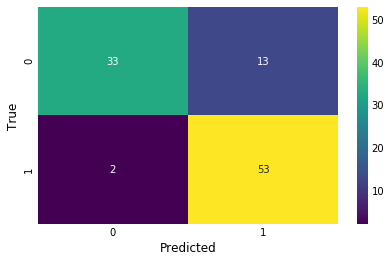

In [22]:
plt.figure(10,10)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')

In [23]:
data['title'] = [' '.join(x) for x in data['title']]

In [24]:
tfidf_buzz = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                           analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3),
                           use_idf=1, smooth_idf=1, sublinear_tf=1, stop_words='english')
buzz = tfidf_buzz.fit_transform(data.loc[data['target']==1, 'title'])

tfidf_news = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                           analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3),
                           use_idf=1, smooth_idf=1, sublinear_tf=1, stop_words='english')
news = tfidf_news.fit_transform(data.loc[data['target']==0, 'title'])

buzz_values = buzz.mean(axis=0).tolist()
buzz_names = tfidf_buzz.get_feature_names()
news_values = news.mean(axis=0).tolist()
news_names = tfidf_news.get_feature_names()

In [25]:
import itertools

q_buzz = pd.DataFrame()
q_buzz['names'] = buzz_names
q_buzz['values'] = list(itertools.chain.from_iterable(buzz_values))
q_buzz = q_buzz.sort_values('values', ascending=True)

q_news = pd.DataFrame()
q_news['names'] = news_names
q_news['values'] = list(itertools.chain.from_iterable(news_values))
q_news = q_news.sort_values('values', ascending=True)

Text(0.5,1,'News')

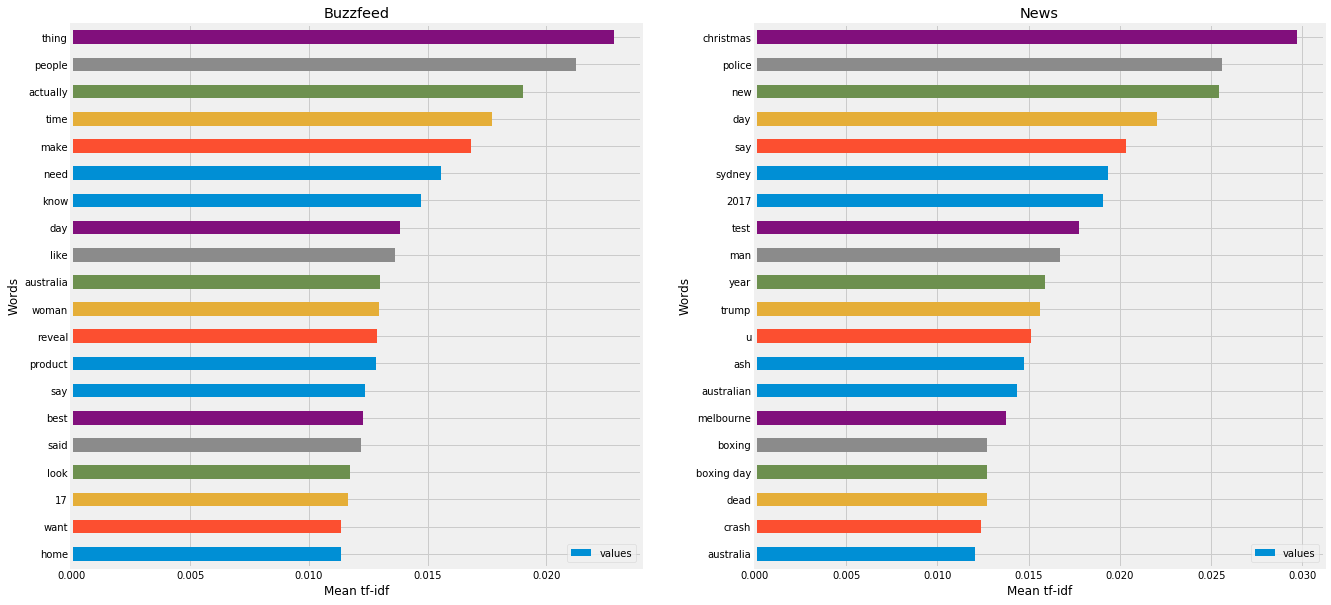

In [37]:
figure, axes = plt.subplots(1,2)
figure.set_figheight(10)
figure.set_figwidth(20)
#plt.tight_layout(8,1)

plot = q_buzz[-20:].plot.barh(x='names', y='values', ax=axes[0], rot=0)
plot.set_xlabel('Mean tf-idf')
plot.set_ylabel('Words')
plot.set_title('Buzzfeed')

plot = q_news[-20:].plot.barh(x='names', y='values', ax=axes[1], rot=0)
plot.set_xlabel('Mean tf-idf')
plot.set_ylabel('Words')
plot.set_title('News')